In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'../..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

from matplotlib import pyplot as plt
import numpy as np
import torch
import config

from HySpecLab.metrics import rmse, sad

/home/abian/Workspace/Anaconda/envs/CLHU/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from dataset import Samson
dataset = Samson(config.Samson_PATH)

result_path = os.path.join(config.RESULTS_PATH, 'samson/matlab/')
X_true = dataset.A@dataset.endmembers()

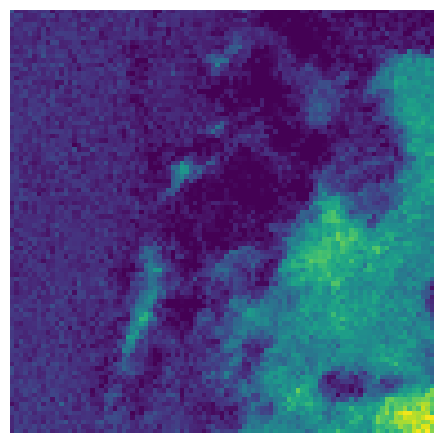

In [3]:
plt.imshow(dataset.image()[:,:,0], cmap='viridis')
plt.axis('off')
plt.show()

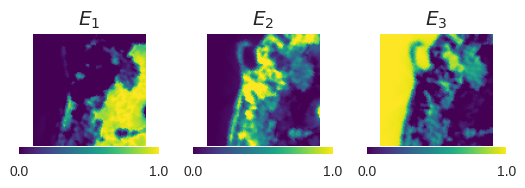

In [4]:
from utils import show_abundance

fig = show_abundance(dataset.abundance(), transpose=False)

In [5]:
path = '/home/abian/Data/Thesis/CLHU/results/apex/matlab/result/'

from scipy import io as sio
# data = sio.loadmat(path+'SocialSparseU.mat')
data = sio.loadmat(path+'FCLS.mat')


eea = sio.loadmat(os.path.join(path, '../endmember_estimation.mat'))
M_nfindr = eea['NFINDR']
M_vca = eea['VCA']

# FCLS

tensor([[0.0268, 0.3881, 0.7659],
        [0.4346, 0.0854, 1.1621],
        [0.8735, 1.2008, 0.1580]]) 0.09006987
tensor([[0.0397, 0.3870, 0.7600],
        [0.4345, 0.0877, 1.1541],
        [0.9247, 1.2181, 0.1566]]) 0.09463797


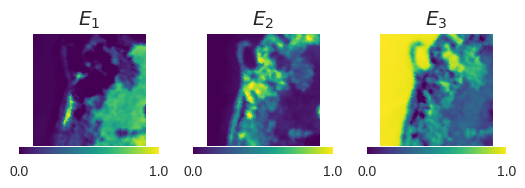

,Method,RMSE_X,RMSE_A,SAD_M
0,LMM+NFINDR,0.020850604,0.13974843372408235,0.094638
1,LMM+VCA,0.15402669,0.13870424334114026,0.090070


In [14]:
fcls_filename = os.path.join(result_path, 'result/FCLS.mat')
FCLS = sio.loadmat(fcls_filename)

M_VCA = sio.loadmat(os.path.join(result_path, 'endmember_estimation.mat'))['VCA']
M_NFINDR = sio.loadmat(os.path.join(result_path, 'endmember_estimation.mat'))['NFINDR']
M_VCA, M_NFINDR = torch.from_numpy(M_VCA), torch.from_numpy(M_NFINDR)



sad_result_vca = sad(M_VCA, dataset.endmembers())
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())
sad_vca = np.diagonal(sad_result_vca.numpy()).mean()

sad_result_nfindr = sad(M_NFINDR, dataset.endmembers())
print(sad_result_nfindr, np.diagonal(sad_result_nfindr.numpy()).mean())
sad_nfindr = np.diagonal(sad_result_nfindr.numpy()).mean()


nfindr_reconstruct = torch.tensor(FCLS['Xhat_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
# vca_reconstruct = torch.tensor(FCLS['Xhat_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_reconstruct = torch.tensor(FCLS['Xhat_VCA']).T
nfindr_A = torch.tensor(FCLS['A_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_A = torch.tensor(FCLS['A_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
# vca_A = torch.tensor(FCLS['A_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T

show_abundance(vca_A.reshape(95,95,-1), transpose=False)
plt.show()

import pandas as pd
fcls_df = pd.DataFrame(columns=['Method', 'RMSE_X', 'RMSE_A', 'SAD_M'])
fcls_df['Method'] = ['LMM+NFINDR', 'LMM+VCA']
fcls_df['RMSE_X'] = [rmse(X_true, nfindr_reconstruct, dim=None).numpy(), rmse(X_true, vca_reconstruct, dim=None).numpy()]
fcls_df['RMSE_A'] = [rmse(dataset.A, nfindr_A, dim=None).numpy(), rmse(dataset.A, vca_A, dim=None).numpy()]
fcls_df['SAD_M'] = [sad_nfindr, sad_vca]
fcls_df

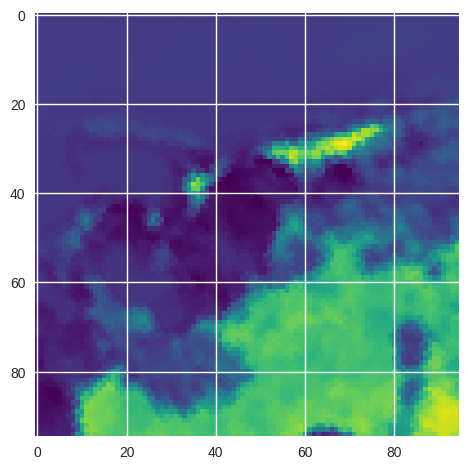

In [13]:
plt.imshow(vca_reconstruct[:,0].reshape(95,95), cmap='viridis')
plt.show()

# ELMM

In [21]:
elmm_filename = os.path.join(result_path, 'result/ELMM.mat')
ELMM = sio.loadmat(elmm_filename)
save_dir = os.path.join(result_path, 'imgs/ELMM')

nfindr_reconstruct = torch.tensor(ELMM['Xhat_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_reconstruct = torch.tensor(ELMM['Xhat_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
nfindr_A = torch.tensor(ELMM['A_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_A = torch.tensor(ELMM['A_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
M_VCA = torch.from_numpy(ELMM['M_VCA']).mean(dim=2).T
M_NFINDR = torch.from_numpy(ELMM['M_NFINDR']).mean(dim=2).T

sad_result_vca = sad(M_VCA, dataset.endmembers())
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())
sad_vca = np.diagonal(sad_result_vca.numpy()).mean()

sad_result_nfindr = sad(M_NFINDR, dataset.endmembers())
print(sad_result_nfindr, np.diagonal(sad_result_nfindr.numpy()).mean())
sad_nfindr = np.diagonal(sad_result_nfindr.numpy()).mean()

import pandas as pd
elmm_df = pd.DataFrame(columns=['Method', 'RMSE_X', 'RMSE_A', 'SAD_M'])
elmm_df['Method'] = ['ELMM+NFINDR', 'ELMM+VCA']
elmm_df['RMSE_X'] = [rmse(X_true, nfindr_reconstruct, dim=None).numpy(), rmse(X_true, vca_reconstruct, dim=None).numpy()]
elmm_df['RMSE_A'] = [rmse(dataset.A, nfindr_A, dim=None).numpy(), rmse(dataset.A, vca_A, dim=None).numpy()]
elmm_df['SAD_M'] = [sad_nfindr, sad_vca]

elmm_df

tensor([[0.0269, 0.3882, 0.7658],
        [0.4347, 0.0853, 1.1620],
        [0.8762, 1.2010, 0.1513]]) 0.08783689
tensor([[0.0378, 0.3872, 0.7601],
        [0.4345, 0.0874, 1.1543],
        [0.9127, 1.2103, 0.1431]]) 0.08944434


,Method,RMSE_X,RMSE_A,SAD_M
0,ELMM+NFINDR,0.02246941828224317,0.14902616739532698,0.089444
1,ELMM+VCA,0.022254384745237096,0.1503818940357426,0.087837


# MESMA

In [22]:
mesma_filename = os.path.join(result_path, 'result/MESMA.mat')
MESMA = sio.loadmat(mesma_filename)
save_dir = os.path.join(result_path, 'imgs/MESMA')

nfindr_reconstruct = torch.tensor(MESMA['Xhat_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_reconstruct = torch.tensor(MESMA['Xhat_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
nfindr_A = torch.tensor(MESMA['A_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_A = torch.tensor(MESMA['A_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
M_VCA = torch.from_numpy(MESMA['M_VCA']).mean(dim=2).T.float()
M_NFINDR = torch.from_numpy(MESMA['M_NFINDR']).mean(dim=2).T.float()

sad_result_vca = sad(M_VCA, dataset.endmembers())
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())
sad_vca = np.diagonal(sad_result_vca.numpy()).mean()

sad_result_nfindr = sad(M_NFINDR, dataset.endmembers())
print(sad_result_nfindr, np.diagonal(sad_result_nfindr.numpy()).mean())
sad_nfindr = np.diagonal(sad_result_nfindr.numpy()).mean()

import pandas as pd
mesma_df = pd.DataFrame(columns=['Method', 'RMSE_X', 'RMSE_A', 'SAD_M'])
mesma_df['Method'] = ['MESMA+NFINDR', 'MESMA+VCA']
mesma_df['RMSE_X'] = [rmse(X_true, nfindr_reconstruct, dim=None).numpy(), rmse(X_true, vca_reconstruct, dim=None).numpy()]
mesma_df['RMSE_A'] = [rmse(dataset.A, nfindr_A, dim=None).numpy(), rmse(dataset.A, vca_A, dim=None).numpy()]
mesma_df['SAD_M'] = [sad_nfindr, sad_vca]

mesma_df

tensor([[0.0189, 0.3546, 0.7945],
        [0.4324, 0.0799, 1.1539],
        [0.9074, 1.2120, 0.1363]]) 0.078367144
tensor([[0.0196, 0.3548, 0.7951],
        [0.4491, 0.0938, 1.1658],
        [0.9138, 1.2143, 0.1419]]) 0.08513164


,Method,RMSE_X,RMSE_A,SAD_M
0,MESMA+NFINDR,0.017691515592114317,0.089932705391243,0.085132
1,MESMA+VCA,0.015117027340254722,0.06243573877779939,0.078367


# SocialSparseU

In [23]:
ssu_filename = os.path.join(result_path, 'result/SocialSparseU.mat')
SSU = sio.loadmat(ssu_filename)
save_dir = os.path.join(result_path, 'imgs/SSU')

nfindr_reconstruct = torch.tensor(SSU['Xhat_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_reconstruct = torch.tensor(SSU['Xhat_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
nfindr_A = torch.tensor(SSU['A_NFINDR'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
vca_A = torch.tensor(SSU['A_VCA'].reshape(-1, 95, 95, order='F')).reshape(-1, 95*95).T
M_VCA = torch.from_numpy(SSU['M_VCA']).mean(dim=2).T.float()
M_NFINDR = torch.from_numpy(SSU['M_NFINDR']).mean(dim=2).T.float()

sad_result_vca = sad(M_VCA, dataset.endmembers())
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())
sad_vca = np.diagonal(sad_result_vca.numpy()).mean()

sad_result_nfindr = sad(M_NFINDR, dataset.endmembers())
print(sad_result_nfindr, np.diagonal(sad_result_nfindr.numpy()).mean())
sad_nfindr = np.diagonal(sad_result_nfindr.numpy()).mean()

import pandas as pd
ssu_df = pd.DataFrame(columns=['Method', 'RMSE_X', 'RMSE_A', 'SAD_M'])
ssu_df['Method'] = ['SSU+NFINDR', 'SSU+VCA']
ssu_df['RMSE_X'] = [rmse(X_true, nfindr_reconstruct, dim=None).numpy(), rmse(X_true, vca_reconstruct, dim=None).numpy()]
ssu_df['RMSE_A'] = [rmse(dataset.A, nfindr_A, dim=None).numpy(), rmse(dataset.A, vca_A, dim=None).numpy()]
ssu_df['SAD_M'] = [sad_nfindr, sad_vca]

ssu_df

tensor([[0.0186, 0.3550, 0.7940],
        [0.4318, 0.0794, 1.1537],
        [0.9072, 1.2118, 0.1360]]) 0.07800687
tensor([[0.0165, 0.3590, 0.7905],
        [0.4494, 0.0942, 1.1663],
        [0.9136, 1.2141, 0.1418]]) 0.08413873


,Method,RMSE_X,RMSE_A,SAD_M
0,SSU+NFINDR,0.018011133810736824,0.08518262481374364,0.084139
1,SSU+VCA,0.015368675136875901,0.05952577796734413,0.078007


# Save Dateframe

In [24]:
df = pd.concat([fcls_df, elmm_df, mesma_df, ssu_df])
df.to_csv(os.path.join(result_path, 'metrics.csv'), index=False)
df

,Method,RMSE_X,RMSE_A,SAD_M
0,LMM+NFINDR,0.020850604,0.13974843372408235,0.094638
1,LMM+VCA,0.020648085,0.13870424334114026,0.090073
0,ELMM+NFINDR,0.02246941828224317,0.14902616739532698,0.089444
1,ELMM+VCA,0.022254384745237096,0.1503818940357426,0.087837
0,MESMA+NFINDR,0.017691515592114317,0.089932705391243,0.085132
1,MESMA+VCA,0.015117027340254722,0.06243573877779939,0.078367
0,SSU+NFINDR,0.018011133810736824,0.08518262481374364,0.084139
1,SSU+VCA,0.015368675136875901,0.05952577796734413,0.078007
